In [1]:
# code to present some figures on statistical moments
# see https://gregorygundersen.com/blog/2020/04/11/moments/
# local file in OneDrive/Documents
using Distributions
using Gnuplot
using Statistics

#Gnuplot.options.mime[MIME"text/html"] = "svg enhanced standalone mouse size 400,250";
println(Gnuplot.options.gpviewer)

false


Moments quantify the three parameters that fully describe a distribution. These parameters are the location, scale, and shape. See the attached exposition for a good summary and intuition on these parameters. The $n$'th moment of a function $f(x)$ about a value $c$ is $$E[(X - c)^n] = \int_{-\infty}^{\infty} (x - c)^n f(x) dx$$
A *raw moment* is a moment about the origin $c = 0$, while a *central moment* is a moment around a distributions mean $c = E[X]$. Central moments *location-invariant*. There is also something called the $n$'th standardized moment, defined as the $n$'th central moment divided by the standard deviation raised to the $n$th power. 

All moments can be estimated by their unbiased estimator. For example, the sample $n$'th central is moment is $$\bar{m_n} = \frac{1}{N}\sum_{k = 1}^K (x_k - c)^n$$.

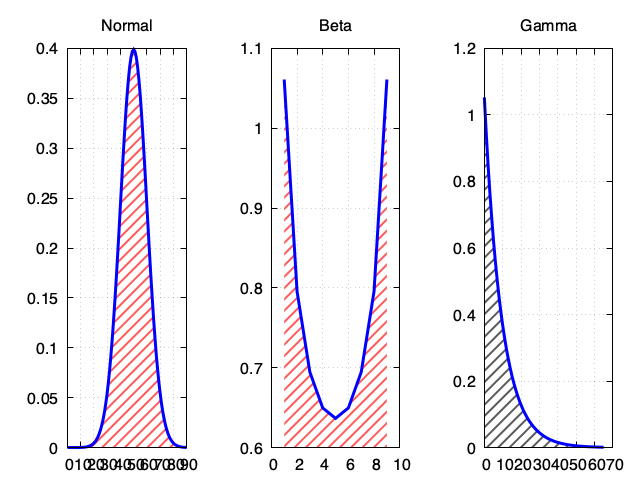

In [2]:
# Total mass. The zeroth moment captures the fact that probability distributions are normalized quantities 

# i don't want to plot the histogram 
#xx  = rand(Normal(2.5, 1), 10000);
#h = hist(xx, bs=0.05)
#@gp h.bins h.counts "with histep notitle"

# just plot the pdf directly
nn = map(x -> pdf(Normal(2.5, 1), x), -2.5:0.1:6.5)
bb = map(x -> pdf(Beta(0.5, 0.5), x), -2.5:0.1:6.5)
bbidx = findall(x -> x > 0, bb)

gg = map(x -> pdf(Gamma(1, 0.95), x), -2.5:0.1:6.5)
ggidx = findall(x -> x > 0, gg)

Gnuplot.options.mime[MIME"text/html"] = "svg enhanced standalone mouse size 800,250";
@gp  "set grid" :-
@gp :- "set multiplot layout 1,3" # rowsfirst margins 0.10,0.95,0.05,0.9 spacing 0.05,0.0" #l r b t
#@gp "set style fill pattern 5 noborder"
@gp :- 1 "set title 'Normal'"
@gp :- 1 nn "with filledcurves fs pattern 5 fc 'red' notitle"
@gp :- 1 nn "with lines lc rgb 'blue' lw 3 notitle"
@gp :- 2 "set yrange [0.6:1.1] "
@gp :- 2 "set title 'Beta'"
@gp :- 2 bb[bbidx] "with filledcurves x1 fs pattern 5 fc 'red' notitle"
@gp :- 2 bb[bbidx] "with lines lc rgb 'blue' lw 3 notitle"
@gp :- 3 "set title 'Gamma'"
@gp :- 3 "set yrange [0:*]"
@gp :- 3 gg[ggidx] "with filledcurves x1 fs pattern 5 fc 'black' notitle"
@gp :- 3 gg[ggidx] "with lines lc rgb 'blue' lw 3 notitle"

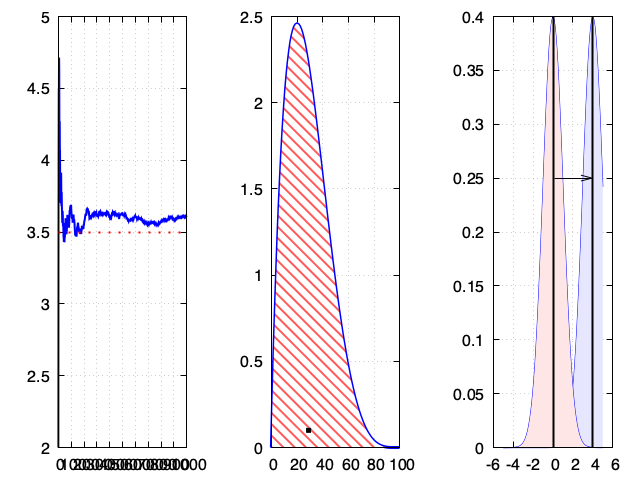

In [3]:
#Gnuplot.options.mime[MIME"text/html"] = "svg enhanced standalone mouse size 800,250";
# First Raw Moment: the Mean
# this is the long-run average intuitively ... for example, for a six sided die, the expected value is 3.5 
# another way to think about it is as a 'center of mass'. The center of mass in physics 
# is  when all the torques due to gravity sum to zero. 
# In other words, the mean is where the probability mass is perfectly balanced
dievals = rand(1:6, 1000)
means = cumsum(dievals) ./ (1:1000)

bb = map(x -> pdf(Beta(2, 5), x), 0:0.01:1.0)
meanloc = round(mean(Beta(2, 5))/0.01)

nn1 = map(x -> pdf(Normal(4, 1), x), -5:.1:5)
nn0 = map(x -> pdf(Normal(0, 1), x), -5:.1:5)
@gp "reset"
@gp :- "set grid"
@gp :- "set multiplot layout 1, 3"
#@gp :- "unset xtics"
@gp :- 1 means "notitle with lines lc 'blue' lw 2"
@gp :- 1 "set arrow from 0,3.5 to 1000,3.5 nohead  lw 2 dashtype 3 lc rgb 'red' front"

@gp :- 2 bb "with lines lc 'blue' lw 3 notitle"
@gp :- 2 bb "with filledcurves x1 notitle fs pattern 4 lc 'red'"
@gp :- 2 "set object 1 circle front at $meanloc,0.1 size 0.4 fillcolor rgb 'black' fs solid lw 4"

@gp :- 3 "unset object 1"
@gp :- 3  -5:.1:5 nn1 "notitle with lines lc 'blue'"
@gp :- 3  -5:.1:5 nn1 "with filledcurves x1 notitle fs solid 0.1 lc 'blue'"
@gp :- 3  -5:.1:5 nn0 "notitle with lines lc 'blue'"
@gp :- 3  -5:.1:5 nn0 "with filledcurves x1 notitle fs solid 0.1 lc rgb 'red'"
@gp :- "set arrow from 0,0 to 0,0.4 nohead  lw 2 dashtype 1 lc rgb 'black' front"
@gp :- "set arrow from 4,0 to 4,0.4 nohead  lw 2 dashtype 1 lc rgb 'black' front"
@gp :- "set arrow from 0.1,0.25 to 3.9,0.25  lw 1  dashtype 1 lc rgb 'black' front"

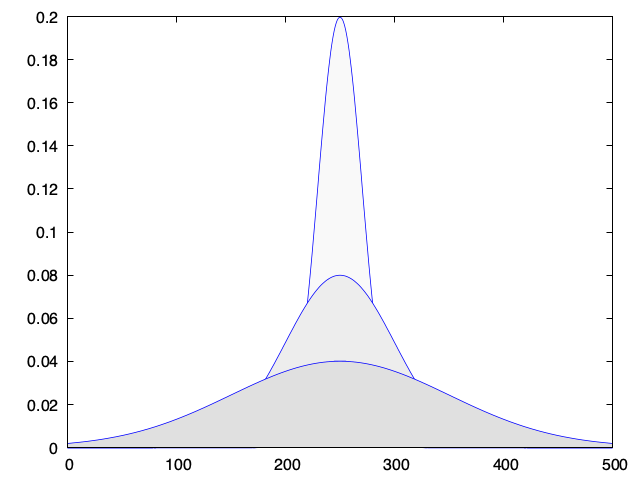

Second Raw Moment of xx: 101.50247721317025, and yy: 3.90800212374715
Second Central Moment of xx: 0.9453980115288704, and yy: 3.9101606123662083


In [49]:
# The second central moment is the variance. Here we are interested in the central moment rather than the 
# raw moment because we are interested in the spread of the distribution regardless of its mean or values. 
nd1 = Normal(100, 2)
nd2 = Normal(100, 5)
nd3 = Normal(100, 10)
drange = 75:0.1:125
nn1 = map(x -> pdf(nd1, x), drange)
nn2 = map(x -> pdf(nd2, x), drange)
nn3 = map(x -> pdf(nd3, x), drange)

#@gp nn1 "with lines"
#@gp :- nn2 "with lines"
#@gp :- nn3 "with lines"

@gp "reset"
@gp :- nn1 "with lines lc 'blue' lw 1.5 notitle"
@gp :- nn1 "with filledcurves x1 notitle fs solid 0.1 lc 'grey'"
@gp :- nn2 "with lines lc 'blue' lw 1.5 notitle"
@gp :- nn2 "with filledcurves x1 notitle fs solid 0.3 lc 'grey'"
@gp :- nn3 "with lines lc 'blue' lw 1.5 notitle"
@gp :- nn3 "with filledcurves x1 notitle fs solid 0.5 lc 'grey'"
display(@gp)
# why are we interested in second central moment rather than second raw moment? 
xx = rand(Normal(10, 1), 1000) # sample numbers from N with mean 1000
yy = rand(Normal(0, 2), 1000) # sample numbers from lower mean with higher variance 

# lets compute the second raw moment = E[X^2]
println("Second Raw Moment of xx: $(mean(xx .^ 2)), and yy: $(mean(yy .^ 2))")
println("Second Central Moment of xx: $(var(xx)), and yy: $(var(yy))")



In [88]:
# The third moment, and this one we will consider the standardized third moment which is shape and location invariant.
# Lets concretize this idea using some numbers 
#  two distributions can have the same mean and variance but different skewnesses
skewnormpdf(x, a) = 2 * pdf(Normal(0, 1), x) * cdf(Normal(0, 1), a*x)
rightskew = map(x -> skewnormpdf(x, 5), -10:0.1:10)
leftskew =  map(x -> skewnormpdf(x, -5), -10:0.1:10)
@gp "reset"
@gp :- "unset xtics"
@gp :- -10:0.1:10 rightskew "notitle with lines lc 'red' lw 3"
@gp :- -10:0.1:10 leftskew "notitle with lines lc 'blue' lw 3"

# plot the data and highlight data that is within one std deviation

#calculate z scores 
z_abs(X) = abs.(X .- mean(X)) ./ std(X)

zscores = z_abs(rightskew)
ztotal = sum(zscores.^3)
zpeak = sum(zscores[findall(x -> x < 1, zscores)])
ztails = sum(zscores[findall(x -> x >= 1, zscores)])
println("in the skewness calculation: $ztails percent comes from the tails despite having less mass ")
#@gp :- rightskew[findall(x -> x < 1, zscores)]

in the skewness calculation: 53.09765312479148 percent comes from the tails despite having less mass 
